In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [101]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 125)

In [102]:
# importing training data
Claims_Data = pd.read_csv('DS Assessment Data.csv')
Claims_Data.head()

,Claim Number,Currency,AdmissionDate,Status,ProcessedDate,SettledDate,DischargeDate,Submission Source,Reimbursement,POValidationDate,ReceivedDate,Processing User,Provider Network,FOB,FamilyofCauses,SpecAssessment,ER,Policy Name,PolicyInceptionDate,ExpiryDate,ContractType,ProductID,BeneficiaryID,DOB,Nationality,Gender,Dependency,MaritalStatus,Member Network,ProviderKey,ProviderType,ProviderCountry,ProviderRegion,Physician ID,Claimed,Denied,PureClaimValueInLocCurr
0,Claim-015494,AED,15/08/2023,Settled,31/08/2023,02/02/2024,15/08/2023,Digital,No,05/09/2023,15/08/2023,User-000060,5,Out-Patient,Physical Illness,"K76.0 Fatty (change of) liver, not elsewhere c...",No,Policy-001314,26/09/2022,26/09/2023,Group,175359,26639373,21/05/1959,India,Male,Principal,Married,4,509102000000,Pharmacy,United Arab Emirates,Abu Dhabi,Physician-000001,471.786,0.0,330.246
1,Claim-022443,AED,09/08/2023,Settled,22/08/2023,25/01/2024,09/08/2023,Digital,No,25/08/2023,09/08/2023,User-000060,5,Out-Patient,Physical Illness,K12.0 Recurrent oral aphthae,No,Policy-001698,25/04/2023,25/04/2024,Group,176264,25565666,27/04/1984,India,Female,Principal,Married,4,509102000000,Pharmacy,United Arab Emirates,Abu Dhabi,Physician-000001,682.290,0.0,545.832
2,Claim-031220,AED,09/08/2023,Settled,22/08/2023,25/01/2024,09/08/2023,Digital,No,25/08/2023,09/08/2023,User-000060,5,Out-Patient,Physical Illness,K12.0 Recurrent oral aphthae,No,Policy-001698,25/04/2023,25/04/2024,Group,176264,25565666,27/04/1984,India,Female,Principal,Married,4,509102000000,Pharmacy,United Arab Emirates,Abu Dhabi,Physician-000001,25.536,0.0,20.412
3,Claim-038218,AED,09/08/2023,Settled,10/08/2023,25/01/2024,09/08/2023,Digital,No,11/08/2023,10/08/2023,User-000142,5,Out-Patient,Physical Illness,K12.0 Recurrent oral aphthae,No,Policy-001698,25/04/2023,25/04/2024,Group,176264,25565666,27/04/1984,India,Female,Principal,Married,4,509102000000,Pharmacy,United Arab Emirates,Abu Dhabi,Physician-000001,107.100,0.0,81.396
4,Claim-009290,AED,26/03/2023,Settled,17/04/2023,27/01/2024,26/03/2023,Digital,No,17/04/2023,10/04/2023,User-000069,4,Out-Patient,Accidental Injury,"T16.1XXA Foreign body in right ear, initial en...",No,Policy-001386,02/02/2023,02/02/2024,Group,263367,14151742,09/04/2018,Philippines,Male,Child,Single,4,509103000000,Hospital,United Arab Emirates,Ajman,Physician-000002,250.320,0.0,225.288


In [103]:
#inspecting the columns
Claims_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40143 entries, 0 to 40142
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Claim Number             40143 non-null  object 
 1   Currency                 40143 non-null  object 
 2   AdmissionDate            40143 non-null  object 
 3   Status                   40143 non-null  object 
 4   ProcessedDate            40143 non-null  object 
 5   SettledDate              40143 non-null  object 
 6   DischargeDate            40143 non-null  object 
 7   Submission Source        40143 non-null  object 
 8   Reimbursement            40143 non-null  object 
 9   POValidationDate         40143 non-null  object 
 10  ReceivedDate             40143 non-null  object 
 11  Processing User          40143 non-null  object 
 12  Provider Network         40143 non-null  int64  
 13  FOB                      40143 non-null  object 
 14  FamilyofCauses        

There are a number of data columns which are in string format in the dataframe. Let us conbert this to datetime

In [104]:
for dtcol in ["AdmissionDate","ProcessedDate","SettledDate","DischargeDate","POValidationDate","ReceivedDate","PolicyInceptionDate","ExpiryDate","DOB"]:
    Claims_Data[dtcol]=pd.to_datetime(Claims_Data[dtcol], format = "%d/%m/%Y")

In [105]:
# Converting the ProviderKey column to string for later use
Claims_Data['ProviderKey']=Claims_Data['ProviderKey'].astype(str)

For ths excercise, first we need to evlaute  cost containment opportunities by building a decison tree regression mode. For this, we could predict the  column **"PureClaimValueInLocCurr"** as  this is actul paid amount against the historical calims. If the prediction is much different from the claimed amount we can flag the claim for further review

For the next task, we are requiredd to predict the time required to process a claim. For this we will create atrget colums as day difffeence between the claim processed date and claim received date

In [106]:
# cretaing the target column for processing time prediction
Claims_Data['ProcessingTime']=(Claims_Data['ProcessedDate'] - Claims_Data['ReceivedDate']).dt.days

Let us check if there are any missing values in any of the columns

In [108]:
 Claims_Data.isnull().sum()

Claim Number               0
Currency                   0
AdmissionDate              0
Status                     0
ProcessedDate              0
SettledDate                0
DischargeDate              0
Submission Source          0
Reimbursement              0
POValidationDate           0
ReceivedDate               0
Processing User            0
Provider Network           0
FOB                        0
FamilyofCauses             0
SpecAssessment             0
ER                         0
Policy Name                0
PolicyInceptionDate        0
ExpiryDate                 0
ContractType               0
ProductID                  0
BeneficiaryID              0
DOB                        0
Nationality                0
Gender                     0
Dependency                 0
MaritalStatus              0
Member Network             0
ProviderKey                0
ProviderType               0
ProviderCountry            0
ProviderRegion             0
Physician ID               0
Claimed       

There are no missing values for any of the columns

## EDA

### Univariate Analysis

Let us inspect the numerical columns first

In [109]:
num_cols=['Claimed','Denied','PureClaimValueInLocCurr','ProcessingTime']

In [110]:
Claims_Data[num_cols].describe()

,Claimed,Denied,PureClaimValueInLocCurr,ProcessingTime
count,4.014300e+04,40143.000000,40143.000000,40143.000000
mean,1.691864e+03,263.974747,1191.291572,15.024811
std,1.423705e+04,1890.223137,6247.901319,19.794649
min,0.000000e+00,0.000000,0.000000,0.000000
25%,3.208800e+02,0.000000,140.868000,0.000000
50%,6.300000e+02,0.000000,405.720000,9.000000
75%,1.411200e+03,0.252000,996.471000,22.000000
max,2.510980e+06,160227.480000,567687.666000,150.000000


Data Distribution


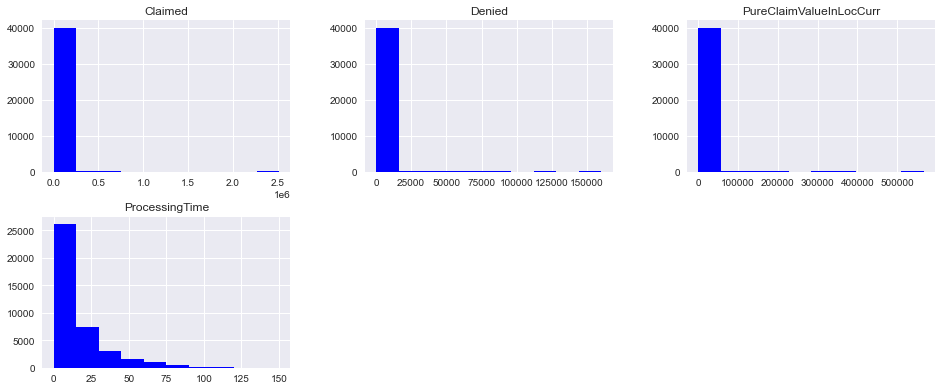

In [111]:
#plotting the distribution
plt.style.use("seaborn")
Claims_Data[num_cols].hist(layout = (3,3), figsize=(16,10), color = 'b')
print('Data Distribution')

There a few big outlier values for both "claimed" and "PureClaimValueInLocCurr"

In [112]:
# let us remove this particularly high outlier
Claims_Data= Claims_Data[Claims_Data['Claim Number']!='Claim-009302']

#### Multivaraite analysis

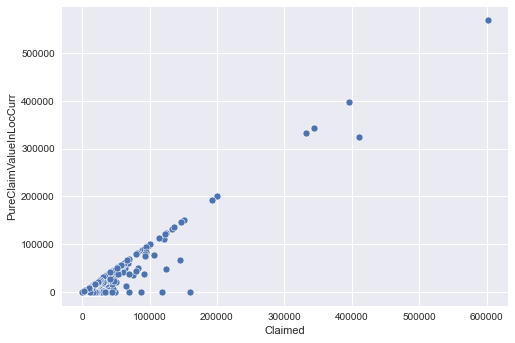

In [113]:
# let us plot the calimed amount vs Pid amount
sns.scatterplot(x=Claims_Data['Claimed'], y=Claims_Data['PureClaimValueInLocCurr'])
plt.show()

As expeceted, there is strong linear relationship between the cliamed amount and paid amount

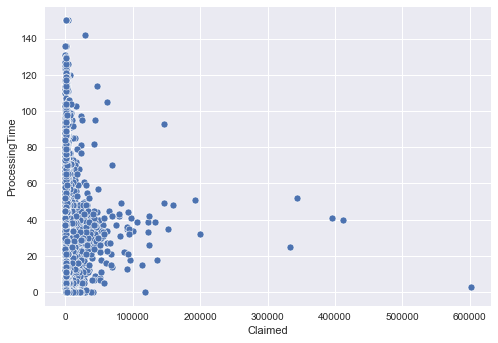

In [114]:
sns.scatterplot(x=Claims_Data['Claimed'], y=Claims_Data['ProcessingTime'])
plt.show()

Here as well we can see a somewhat linear trend espcially if the claim is high. This might indcate high claim undergoes longer review and back-and-forth.

let us check the categorical columsn next

In [115]:
categ_cols = Claims_Data.select_dtypes(include = ['object'] ).columns
categ_cols

Index(['Claim Number', 'Currency', 'Status', 'Submission Source',
       'Reimbursement', 'Processing User', 'FOB', 'FamilyofCauses',
       'SpecAssessment', 'ER', 'Policy Name', 'ContractType', 'Nationality',
       'Gender', 'Dependency', 'MaritalStatus', 'ProviderKey', 'ProviderType',
       'ProviderCountry', 'ProviderRegion', 'Physician ID'],
      dtype='object')

In [19]:
# checking for percentage of each level in the categ features
for col in categ_cols:
    print(col)
    print(Claims_Data[col].value_counts(normalize=True)*100)
    print('\n--------------\n')

Claim Number
Claim-017051    0.019929
Claim-034371    0.014947
Claim-004249    0.014947
Claim-025315    0.012456
Claim-002737    0.012456
                  ...   
Claim-036828    0.002491
Claim-000164    0.002491
Claim-008174    0.002491
Claim-017149    0.002491
Claim-020021    0.002491
Name: Claim Number, Length: 39757, dtype: float64

--------------

Currency
AED    100.0
Name: Currency, dtype: float64

--------------

Status
Settled    100.0
Name: Status, dtype: float64

--------------

Submission Source
Digital        95.463604
Non-Digital     4.536396
Name: Submission Source, dtype: float64

--------------

Reimbursement
No     99.217777
Yes     0.782223
Name: Reimbursement, dtype: float64

--------------

Processing User
User-000142    43.881720
User-000060     5.067012
User-000064     4.830352
User-000172     1.933137
User-000097     1.596831
                 ...    
User-000125     0.002491
User-000175     0.002491
User-000110     0.002491
User-000112     0.002491
User-000082  

Let us now check the replationship between the a few of this categorical columns and each of the target

In [116]:
categ_cols=[ 'Submission Source', 'Reimbursement', 'FOB',
       'FamilyofCauses',  'ER',
       'Gender', 'Dependency', 'MaritalStatus', 'ProviderType', 'ProviderRegion']

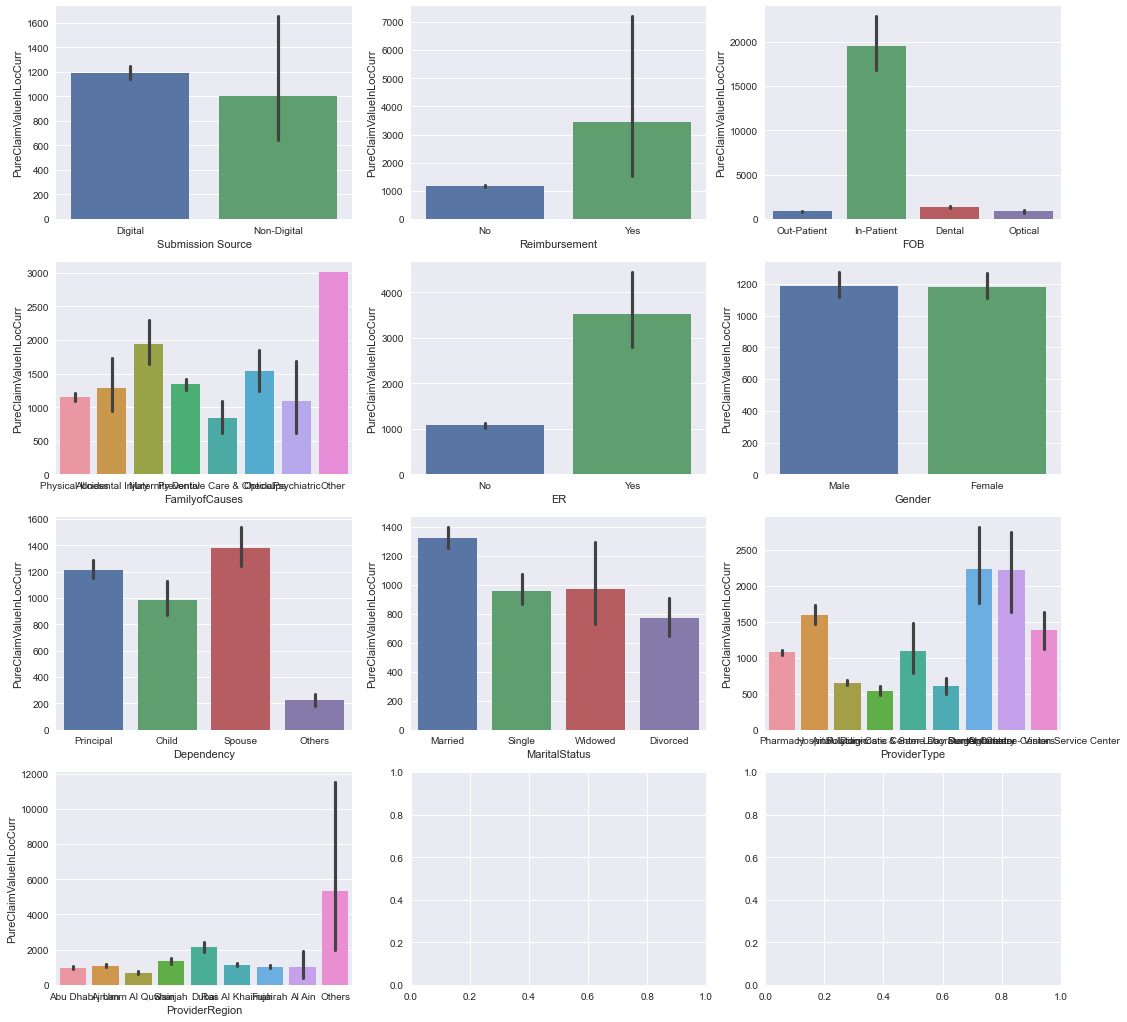

In [117]:
fig, ax = plt.subplots(4, 3 , figsize=(18, 18))
col_index = 0
for x in range(4): 
    for y in range(3):

        sns.barplot(data =Claims_Data, x=categ_cols[col_index], y='PureClaimValueInLocCurr' , ax=ax[x][y])
        col_index+= 1
        if col_index >= len(categ_cols):
            break   

Thre are a few clear trends
- In-patient claim payment are high as expected
- Claim payment through digital channel is slightly higher, but may not be significant as non-digital cliams are fewer
- Claim payment are generally higher for reimbursemnt vs Direct
- Claim payment for ER are generally high as expected

<AxesSubplot:xlabel='ProviderType', ylabel='PureClaimValueInLocCurr'>

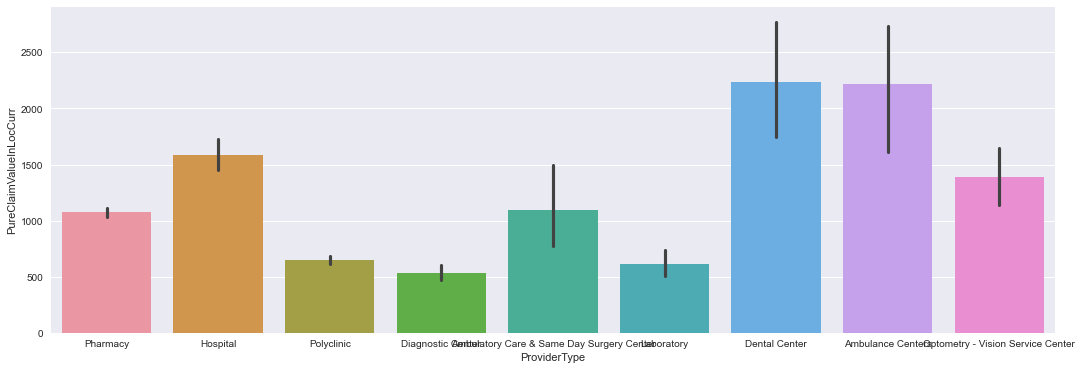

In [118]:
# Let us check ProviderType further as it is not clear in the above
plt.figure(figsize=(18, 6))
sns.barplot(data =Claims_Data, x='ProviderType', y='PureClaimValueInLocCurr' )

- Dental and optical claim payment are notably higher

Let us now visualize the same for "Processing Time"

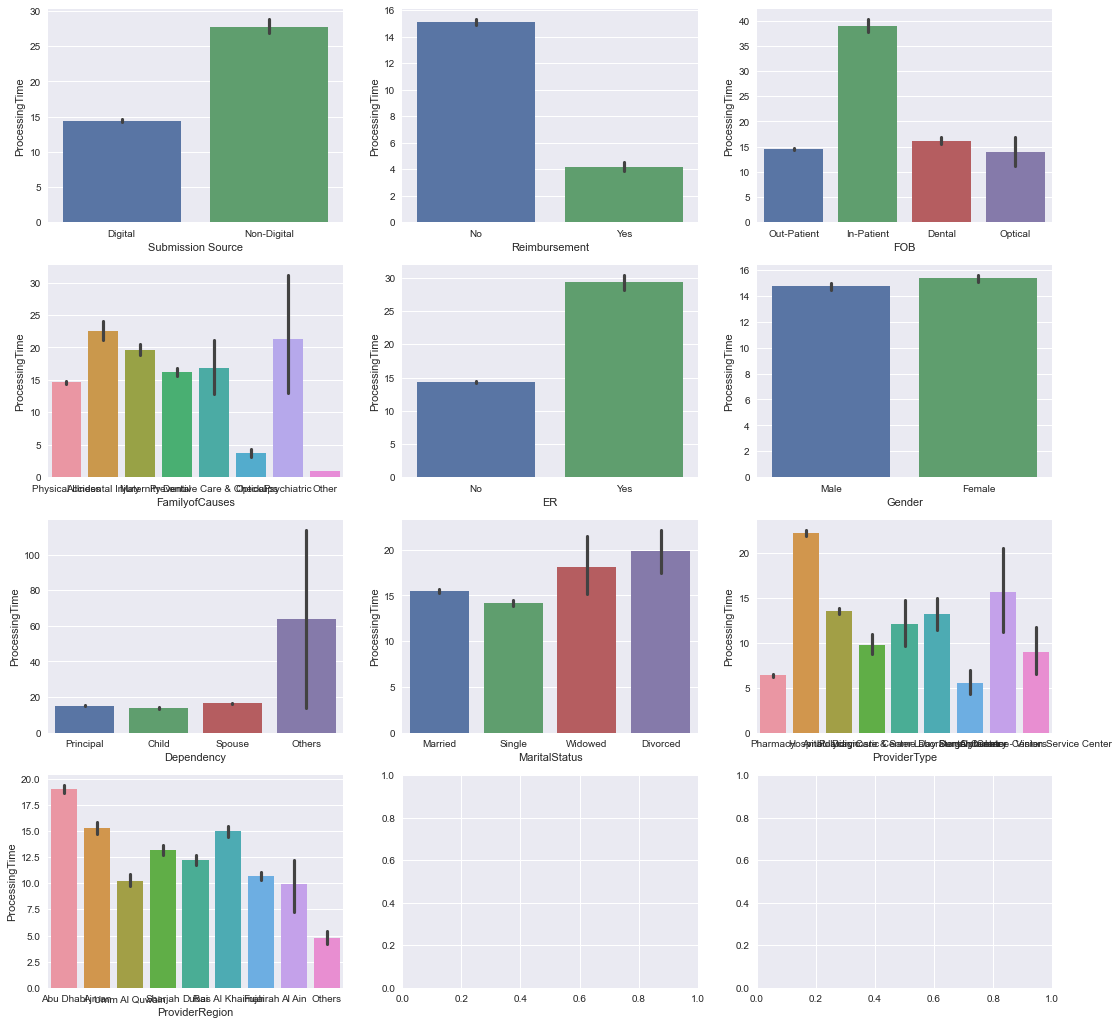

In [119]:
fig, ax = plt.subplots(4, 3 , figsize=(18, 18))
col_index = 0
for x in range(4): 
    for y in range(3):

        sns.barplot(data =Claims_Data, x=categ_cols[col_index], y='ProcessingTime' , ax=ax[x][y])
        col_index+= 1
        if col_index >= len(categ_cols):
            break   

- It takes longer for ER claims to be processed
- Claimes are processed slower for Abu Dhabi providers
- In-patients claims are processed slower, possible because of higher amount and admission

<AxesSubplot:xlabel='ProviderType', ylabel='ProcessingTime'>

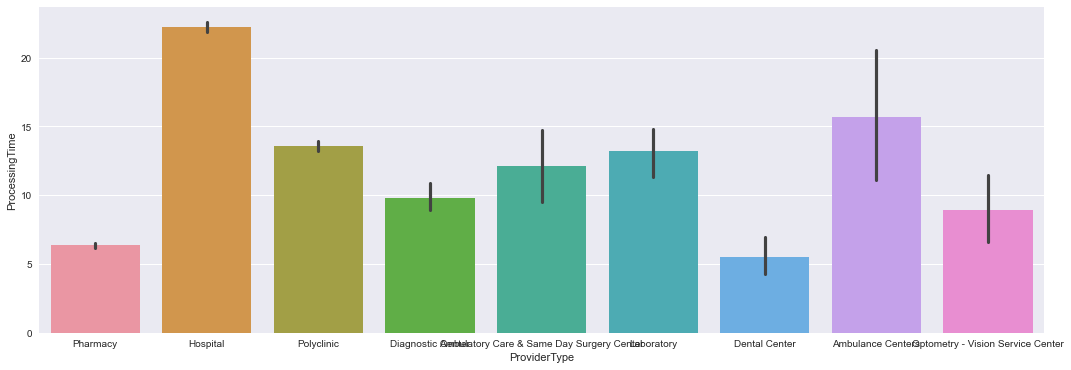

In [120]:
plt.figure(figsize=(18, 6))
sns.barplot(data =Claims_Data, x='ProviderType', y='ProcessingTime' )

### Feature Engineering And Preprocessing

Let us now create a few additinal features that would be helpful in the prediction of the target

In [121]:
Claims_Data_Final = Claims_Data.copy()

In [122]:
# creating a fetaure for hostpitla admission days
Claims_Data_Final['AdmissionDays']=(Claims_Data_Final["DischargeDate"]-Claims_Data_Final["AdmissionDate"]).dt.days

In [123]:
# creating a fetaure for the age of the member
Claims_Data_Final['MemberAge']=Claims_Data_Final['AdmissionDate'].dt.year - Claims_Data_Final['DOB'].dt.year

In [124]:
# some policies are expired by the time the claim is recieved and this may lead to rejection of the claim
Claims_Data_Final['IsExpiredPolicy'] = np.where(Claims_Data_Final['ReceivedDate']>Claims_Data_Final['ExpiryDate'], 1, 0)

In [125]:
#mapping the fetaures with binary values
Claims_Data_Final['Submission Source'] =Claims_Data_Final['Submission Source'] .map({'Digital':1, 'Non-Digital':0})
Claims_Data_Final['Reimbursement'] =Claims_Data_Final['Reimbursement'] .map({'No':1, 'Yes':0})
Claims_Data_Final['ER'] =Claims_Data_Final['ER'] .map({'No':1, 'Yes':0})
Claims_Data_Final['Gender'] =Claims_Data_Final['Gender'] .map({'Male':1, 'Female':0})

Some columns like PolicyName, ProductID, Nationality etc have too many categorical levels. We will go wuth an approach where we will take only top categories and club the res of the values to some default values (like "Other", "000" ect)

In [126]:

def get_top_categ_level(col, top_n=10):
    
    top_categ =  list(Claims_Data_Final[col].value_counts()[:top_n].index)
    
    return top_categ 

In [127]:
#get the top 10 policies and club the rest as "0000" 
top_policies = get_top_categ_level('Policy Name',10)
Claims_Data_Final['Policy Name']=Claims_Data_Final['Policy Name'].apply(lambda x : x if x in top_policies else "0000")

In [128]:
#get the top 10 ProductIDs and club the rest as "0000" 
top_ProductIDs = get_top_categ_level('ProductID',15)
Claims_Data_Final['ProductID']=Claims_Data_Final['ProductID'].apply(lambda x : x if x in top_ProductIDs else "0000")

In [129]:
#get the top 10 Nationalities and club the rest as "Other" 
top_Nationalitys = get_top_categ_level('Nationality',10)
Claims_Data_Final['Nationality']=Claims_Data_Final['Nationality'].apply(lambda x : x if x in  top_Nationalitys else "Other")

In [130]:
#get the top 10 ProviderKeys and club the rest as "0000" 
top_ProviderKeys = get_top_categ_level('ProviderKey',10)
Claims_Data_Final['ProviderKey']=Claims_Data_Final['ProviderKey'].apply(lambda x : x if x in  top_ProviderKeys else "0000")

Let us look at the imapact of these features on Paid Amount

<AxesSubplot:xlabel='Policy Name', ylabel='PureClaimValueInLocCurr'>

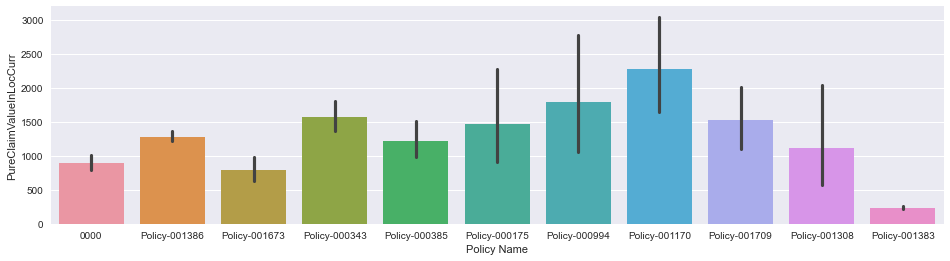

In [131]:
plt.figure(figsize=(16,4))
sns.barplot(data =Claims_Data_Final, x='Policy Name', y='PureClaimValueInLocCurr' )

<AxesSubplot:xlabel='ProductID', ylabel='PureClaimValueInLocCurr'>

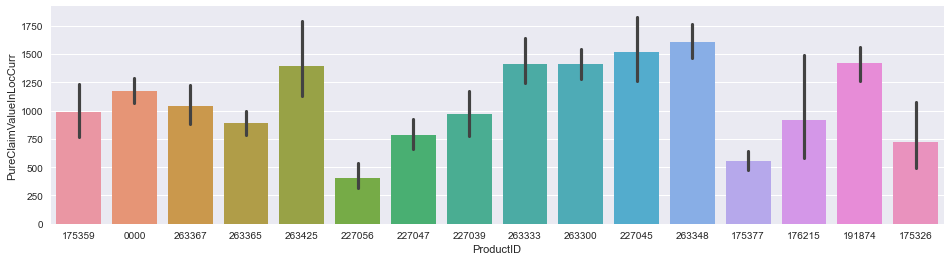

In [132]:
plt.figure(figsize=(16,4))
sns.barplot(data =Claims_Data_Final, x='ProductID', y='PureClaimValueInLocCurr' )

<AxesSubplot:xlabel='ProviderKey', ylabel='PureClaimValueInLocCurr'>

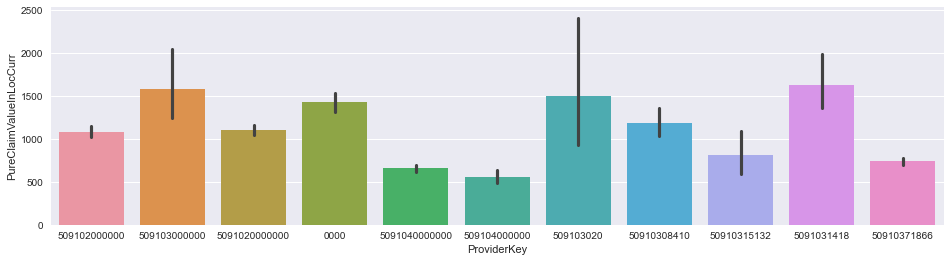

In [133]:
plt.figure(figsize=(16,4))
sns.barplot(data =Claims_Data_Final, x='ProviderKey', y='PureClaimValueInLocCurr' )

As seen, there are a few products, policy and provider for the paid claim amount is higher

Now, let us analyze the same for Processing Time

<AxesSubplot:xlabel='Policy Name', ylabel='ProcessingTime'>

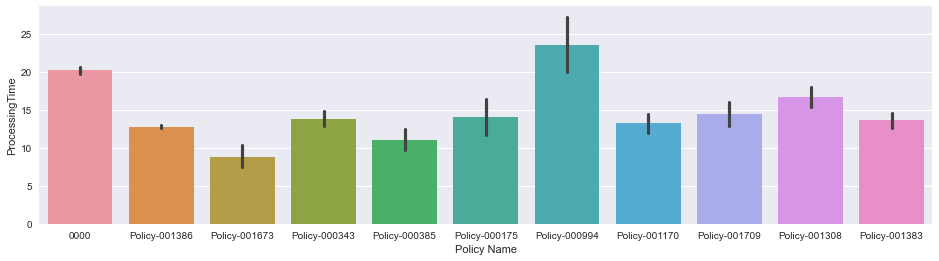

In [134]:
plt.figure(figsize=(16,4))
sns.barplot(data =Claims_Data_Final, x='Policy Name', y='ProcessingTime' )

<AxesSubplot:xlabel='ProductID', ylabel='ProcessingTime'>

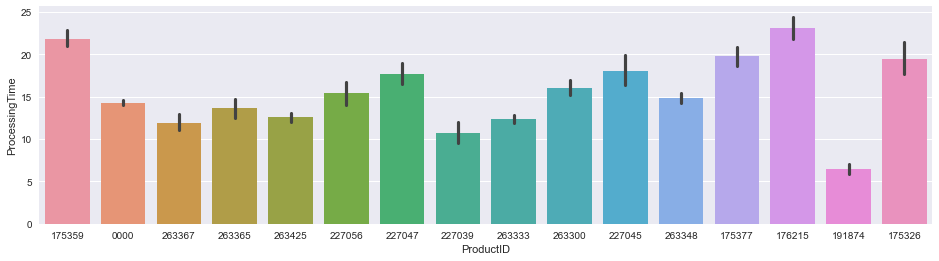

In [135]:
plt.figure(figsize=(16,4))
sns.barplot(data =Claims_Data_Final, x='ProductID', y='ProcessingTime' )

<AxesSubplot:xlabel='ProviderKey', ylabel='ProcessingTime'>

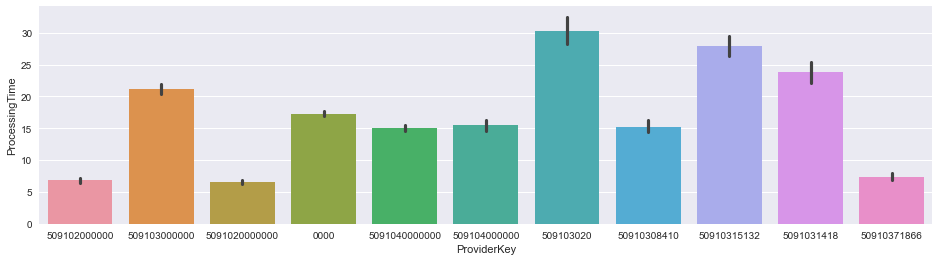

In [136]:
plt.figure(figsize=(16,4))
sns.barplot(data =Claims_Data_Final, x='ProviderKey', y='ProcessingTime' )

Here as well we can see that A there are a few products, policy and provider that takes longer to process claims

In [137]:
#cleaning the columns names
Claims_Data_Final.columns = [x.replace(" ","") for x in Claims_Data_Final.columns]

Now we will one-hot encode the categorical variables, so that they can be used by the models

In [138]:
df_final = pd.get_dummies(Claims_Data_Final, columns =['PolicyName', 'Nationality','ProductID','ProviderNetwork','FOB','FamilyofCauses','Dependency','MaritalStatus','MemberNetwork','ProviderType','ProviderRegion','ProviderKey'], drop_first=True)
df_final.head()

,ClaimNumber,Currency,AdmissionDate,Status,ProcessedDate,SettledDate,DischargeDate,SubmissionSource,Reimbursement,POValidationDate,ReceivedDate,ProcessingUser,SpecAssessment,ER,PolicyInceptionDate,ExpiryDate,ContractType,BeneficiaryID,DOB,Gender,ProviderCountry,PhysicianID,Claimed,Denied,PureClaimValueInLocCurr,ProcessingTime,AdmissionDays,MemberAge,IsExpiredPolicy,PolicyName_Policy-000175,PolicyName_Policy-000343,PolicyName_Policy-000385,PolicyName_Policy-000994,PolicyName_Policy-001170,PolicyName_Policy-001308,PolicyName_Policy-001383,PolicyName_Policy-001386,PolicyName_Policy-001673,PolicyName_Policy-001709,Nationality_Egypt,Nationality_India,Nationality_Jordan,Nationality_Other,Nationality_Pakistan,Nationality_Palestine,Nationality_Philippines,Nationality_Sudan,Nationality_Syria,Nationality_United Arab Emirates,ProductID_175359,ProductID_175377,ProductID_176215,ProductID_191874,ProductID_227039,ProductID_227045,ProductID_227047,ProductID_227056,ProductID_263300,ProductID_263333,ProductID_263348,ProductID_263365,ProductID_263367,ProductID_263425,ProductID_0000,ProviderNetwork_2,ProviderNetwork_3,ProviderNetwork_4,ProviderNetwork_5,ProviderNetwork_6,FOB_In-Patient,FOB_Optical,FOB_Out-Patient,FamilyofCauses_Dental,FamilyofCauses_Maternity,FamilyofCauses_Optical,FamilyofCauses_Other,FamilyofCauses_Physical Illness,FamilyofCauses_Preventive Care & Checkups,FamilyofCauses_Psychiatric,Dependency_Others,Dependency_Principal,Dependency_Spouse,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,MemberNetwork_2,MemberNetwork_3,MemberNetwork_4,MemberNetwork_5,MemberNetwork_6,ProviderType_Ambulatory Care & Same Day Surgery Center,ProviderType_Dental Center,ProviderType_Diagnostic Center,ProviderType_Hospital,ProviderType_Laboratory,ProviderType_Optometry - Vision Service Center,ProviderType_Pharmacy,ProviderType_Polyclinic,ProviderRegion_Ajman,ProviderRegion_Al Ain,ProviderRegion_Dubai,ProviderRegion_Fujairah,ProviderRegion_Others,ProviderRegion_Ras Al Khaimah,ProviderRegion_Sharjah,ProviderRegion_Umm Al Quwain,ProviderKey_509102000000,ProviderKey_5091020000000,ProviderKey_509103000000,ProviderKey_509103020,ProviderKey_50910308410,ProviderKey_5091031418,ProviderKey_50910315132,ProviderKey_50910371866,ProviderKey_509104000000,ProviderKey_5091040000000
0,Claim-015494,AED,2023-08-15,Settled,2023-08-31,2024-02-02,2023-08-15,1,1,2023-09-05,2023-08-15,User-000060,"K76.0 Fatty (change of) liver, not elsewhere c...",1,2022-09-26,2023-09-26,Group,26639373,1959-05-21,1,United Arab Emirates,Physician-000001,471.786,0.0,330.246,16,0,64,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Claim-022443,AED,2023-08-09,Settled,2023-08-22,2024-01-25,2023-08-09,1,1,2023-08-25,2023-08-09,User-000060,K12.0 Recurrent oral aphthae,1,2023-04-25,2024-04-25,Group,25565666,1984-04-27,0,United Arab Emirates,Physician-000001,682.290,0.0,545.832,13,0,39,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Claim-031220,AED,2023-08-09,Settled,2023-08-22,2024-01-25,2023-08-09,1,1,2023-08-25,2023-08-09,User-000060,K12.0 Recurrent oral aphthae,1,2023-04-25,2024-04-25,Group,25565666,1984-04-27,0,United Arab Emirates,Physician-000001,25.536,0.0,20.412,13,0,39,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Claim-038218,AED,2023-08-09,Settled,2023-08-10,2024-01-25,2023-08-09,1,1,2023-08-11,2023-08-10,User-000142,K12.0 Recurrent oral aphthae,1,2023-04-25,2024-04-25,Group,25565666,1984-04-27,0,United Arab Emirates,Physician-000001,107.100,0.0,81.396,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,

Let us now prepare the final dataset by removing the unwanted features

In [139]:
df_claims_final = df_final.drop(columns=['ClaimNumber','Currency','ProcessedDate','AdmissionDate','PolicyInceptionDate','Status','SettledDate','DischargeDate','POValidationDate','ReceivedDate','ProcessingUser','SpecAssessment','ExpiryDate','ContractType','BeneficiaryID','DOB','Denied','ProviderCountry','PhysicianID','ProcessingTime'])

Let us now prepare the data for training and validation

In [140]:
from sklearn.model_selection import train_test_split

In [142]:
# creating tarainG and validatin set
df_train, df_test = train_test_split(df_claims_final, test_size=0.2, random_state=42)

In [143]:
df_train.head()

,SubmissionSource,Reimbursement,ER,Gender,Claimed,PureClaimValueInLocCurr,AdmissionDays,MemberAge,IsExpiredPolicy,PolicyName_Policy-000175,PolicyName_Policy-000343,PolicyName_Policy-000385,PolicyName_Policy-000994,PolicyName_Policy-001170,PolicyName_Policy-001308,PolicyName_Policy-001383,PolicyName_Policy-001386,PolicyName_Policy-001673,PolicyName_Policy-001709,Nationality_Egypt,Nationality_India,Nationality_Jordan,Nationality_Other,Nationality_Pakistan,Nationality_Palestine,Nationality_Philippines,Nationality_Sudan,Nationality_Syria,Nationality_United Arab Emirates,ProductID_175359,ProductID_175377,ProductID_176215,ProductID_191874,ProductID_227039,ProductID_227045,ProductID_227047,ProductID_227056,ProductID_263300,ProductID_263333,ProductID_263348,ProductID_263365,ProductID_263367,ProductID_263425,ProductID_0000,ProviderNetwork_2,ProviderNetwork_3,ProviderNetwork_4,ProviderNetwork_5,ProviderNetwork_6,FOB_In-Patient,FOB_Optical,FOB_Out-Patient,FamilyofCauses_Dental,FamilyofCauses_Maternity,FamilyofCauses_Optical,FamilyofCauses_Other,FamilyofCauses_Physical Illness,FamilyofCauses_Preventive Care & Checkups,FamilyofCauses_Psychiatric,Dependency_Others,Dependency_Principal,Dependency_Spouse,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,MemberNetwork_2,MemberNetwork_3,MemberNetwork_4,MemberNetwork_5,MemberNetwork_6,ProviderType_Ambulatory Care & Same Day Surgery Center,ProviderType_Dental Center,ProviderType_Diagnostic Center,ProviderType_Hospital,ProviderType_Laboratory,ProviderType_Optometry - Vision Service Center,ProviderType_Pharmacy,ProviderType_Polyclinic,ProviderRegion_Ajman,ProviderRegion_Al Ain,ProviderRegion_Dubai,ProviderRegion_Fujairah,ProviderRegion_Others,ProviderRegion_Ras Al Khaimah,ProviderRegion_Sharjah,ProviderRegion_Umm Al Quwain,ProviderKey_509102000000,ProviderKey_5091020000000,ProviderKey_509103000000,ProviderKey_509103020,ProviderKey_50910308410,ProviderKey_5091031418,ProviderKey_50910315132,ProviderKey_50910371866,ProviderKey_509104000000,ProviderKey_5091040000000
30214,0,1,1,1,1336.65,1069.320,0,42,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18903,1,1,1,1,15349.74,12433.302,0,57,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
20218,1,1,1,1,257.04,0.000,0,43,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9985,1,1,1,1,1869.00,1513.890,0,7,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
36386,1,1,1,0,3175.20,1260.000,0,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [149]:
# creating the train and test variables for Cost Prediction
X_train = df_train.drop(['PureClaimValueInLocCurr'], axis=1)
y_train = df_train['PureClaimValueInLocCurr']
X_test = df_test.drop(['PureClaimValueInLocCurr'], axis=1)
y_test = df_test['PureClaimValueInLocCurr']

### Modelling

In [150]:
# importing the required modelling and validation libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 

In [151]:
#fitting the model to the training data
DT = DecisionTreeRegressor(random_state=12, max_depth=15)
DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=12)

In [152]:
DT.score(X_train, y_train)

0.9957538251246975

In [153]:
# checking test R2 score
DT.score(X_test, y_test)

0.9511169624615081

The model seems to be reasonably good as it gives high R2 score for both tarin and test sets

Let us now create function that can be used for the different evaluation metrics for the different models we are going to build

In [154]:
#creating custom function to capture the evaluation metric
def get_model_comparison_metrics(model,   X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    return pd.DataFrame( {'model_name' :model.__class__.__name__ , 
                          'Data': ['Train', 'Test'],
                          'R2 Score': [model.score( X_train, y_train), model.score( X_test, y_test)],
                         'MAE' :[mean_absolute_error(y_train,y_train_pred), mean_absolute_error(y_test,y_test_pred)],
                          'MSE':  [np.sqrt(mean_squared_error(y_train,y_train_pred)), np.sqrt(mean_squared_error(y_test,y_test_pred))]})  

In [155]:
# gettin the eval metrics for both train and test
get_model_comparison_metrics(DT,   X_train, y_train, X_test, y_test)

,model_name,Data,R2 Score,MAE,MSE
0,DecisionTreeRegressor,Train,0.995754,156.427887,366.857717
1,DecisionTreeRegressor,Test,0.951117,330.644640,1679.348127


We can see that on testset other metrics like MAE and MSE are worse even though R2 is high. Let us see if we can improve the model by tuningt he hyper params

In [156]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [157]:
param_grid  = {  "min_samples_leaf" : [1,2],
               "min_samples_split" : [ 2, 4, 6], 'max_depth' : [15,30,50]}

DT2 = DecisionTreeRegressor(  random_state=12)
cv_dtree = GridSearchCV(estimator=DT2, param_grid=param_grid, scoring = 'neg_mean_squared_error')
cv_dtree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=12),
             param_grid={'max_depth': [15, 30, 50], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6]},
             scoring='neg_mean_squared_error')

In [158]:
#tuned model
dtree_tuned = cv_dtree.best_estimator_

In [159]:
cv_dtree.best_params_

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [160]:
# checking tuned model metrics
get_model_comparison_metrics(dtree_tuned,   X_train, y_train, X_test, y_test)

,model_name,Data,R2 Score,MAE,MSE
0,DecisionTreeRegressor,Train,0.962776,181.891861,1086.206418
1,DecisionTreeRegressor,Test,0.910076,352.852170,2277.719671


The tuned model in this case doesnt look better than our original model. We might need to expand our paramter search to get better model.For now, we will go with our original model as we have limited compute to do more fine tuning

#### Processing Time Prediction

In [161]:
#getting the final features
df_ProcessingTime = df_final.drop(columns=['ClaimNumber','Currency','ProcessedDate','AdmissionDate','PolicyInceptionDate','Status','SettledDate','DischargeDate','POValidationDate','ReceivedDate','ProcessingUser','SpecAssessment','ExpiryDate','ContractType','BeneficiaryID','DOB','Denied','ProviderCountry','PhysicianID','PureClaimValueInLocCurr'])

In [162]:
#splitting the data into tarin and validation set
df_train_ProcessingTime, df_test_ProcessingTime = train_test_split(df_ProcessingTime, test_size=0.2, random_state=42)

In [163]:
df_ProcessingTime.head()

,SubmissionSource,Reimbursement,ER,Gender,Claimed,ProcessingTime,AdmissionDays,MemberAge,IsExpiredPolicy,PolicyName_Policy-000175,PolicyName_Policy-000343,PolicyName_Policy-000385,PolicyName_Policy-000994,PolicyName_Policy-001170,PolicyName_Policy-001308,PolicyName_Policy-001383,PolicyName_Policy-001386,PolicyName_Policy-001673,PolicyName_Policy-001709,Nationality_Egypt,Nationality_India,Nationality_Jordan,Nationality_Other,Nationality_Pakistan,Nationality_Palestine,Nationality_Philippines,Nationality_Sudan,Nationality_Syria,Nationality_United Arab Emirates,ProductID_175359,ProductID_175377,ProductID_176215,ProductID_191874,ProductID_227039,ProductID_227045,ProductID_227047,ProductID_227056,ProductID_263300,ProductID_263333,ProductID_263348,ProductID_263365,ProductID_263367,ProductID_263425,ProductID_0000,ProviderNetwork_2,ProviderNetwork_3,ProviderNetwork_4,ProviderNetwork_5,ProviderNetwork_6,FOB_In-Patient,FOB_Optical,FOB_Out-Patient,FamilyofCauses_Dental,FamilyofCauses_Maternity,FamilyofCauses_Optical,FamilyofCauses_Other,FamilyofCauses_Physical Illness,FamilyofCauses_Preventive Care & Checkups,FamilyofCauses_Psychiatric,Dependency_Others,Dependency_Principal,Dependency_Spouse,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,MemberNetwork_2,MemberNetwork_3,MemberNetwork_4,MemberNetwork_5,MemberNetwork_6,ProviderType_Ambulatory Care & Same Day Surgery Center,ProviderType_Dental Center,ProviderType_Diagnostic Center,ProviderType_Hospital,ProviderType_Laboratory,ProviderType_Optometry - Vision Service Center,ProviderType_Pharmacy,ProviderType_Polyclinic,ProviderRegion_Ajman,ProviderRegion_Al Ain,ProviderRegion_Dubai,ProviderRegion_Fujairah,ProviderRegion_Others,ProviderRegion_Ras Al Khaimah,ProviderRegion_Sharjah,ProviderRegion_Umm Al Quwain,ProviderKey_509102000000,ProviderKey_5091020000000,ProviderKey_509103000000,ProviderKey_509103020,ProviderKey_50910308410,ProviderKey_5091031418,ProviderKey_50910315132,ProviderKey_50910371866,ProviderKey_509104000000,ProviderKey_5091040000000
0,1,1,1,1,471.786,16,0,64,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0,682.290,13,0,39,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,1,1,0,25.536,13,0,39,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,1,1,0,107.100,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,250.320,7,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [164]:
# creating the train and test variables for Processing Time Prediction
X_train2 = df_train_ProcessingTime.drop(['ProcessingTime'], axis=1)
y_train2  = df_train_ProcessingTime['ProcessingTime']
X_test2 = df_test_ProcessingTime.drop(['ProcessingTime'], axis=1)
y_test2 = df_test_ProcessingTime['ProcessingTime']

In [165]:
#fitting the model to the training data
RF = RandomForestRegressor(random_state=15, n_estimators=100, max_depth =20)
RF.fit(X_train2, y_train2)

RandomForestRegressor(max_depth=20, random_state=15)

In [166]:
# checking the train R2 socre
RF.score(X_train2, y_train2)

0.827326767131216

In [167]:
# checking the test R2 socre
RF.score(X_test2, y_test2)

0.5058830479756525

In [168]:
# checking more eval metrics
get_model_comparison_metrics(RF,   X_train2, y_train2, X_test2, y_test2)

,model_name,Data,R2 Score,MAE,MSE
0,RandomForestRegressor,Train,0.827327,5.420760,8.271357
1,RandomForestRegressor,Test,0.505883,8.623101,13.594481


The model peformance on the test dataset is not as good as that on the tes set especillay for R2 score. There is evidence for slight overfit. Let us tune the model using a k-fold cross valiadation approach to reduce the overfitting and try to improve the eavl metrcs as well

In [169]:
# Let us tune the model
param_grid  = {  "min_samples_leaf" : [1, 2, 4],"n_estimators": [ 50,  100,200],
               "max_depth" : [ 20, 30,50]}
rf2 = RandomForestRegressor(  random_state=42)
cv_rf2= GridSearchCV(estimator=rf2, param_grid=param_grid)
cv_rf2.fit(X_train2, y_train2)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [20, 30, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]})

In [170]:
rf_tuned = cv_rf2.best_estimator_

In [171]:
cv_rf2.best_params_

{'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 200}

In [172]:
get_model_comparison_metrics(rf_tuned,   X_train2, y_train2, X_test2, y_test2)

,model_name,Data,R2 Score,MAE,MSE
0,RandomForestRegressor,Train,0.843684,4.759018,7.869841
1,RandomForestRegressor,Test,0.509910,8.539181,13.538967


The overfitting has slightly reduced and test metrics have slightly improved. As in the case of our cost prediction model,we  might need to expand our paramter search to get better model.For now, we will go with this model as we have limited compute to do more fine tuning

### Next Steps

- Analyze the column "SpecAssessment" more using GenAI to categorize the diagnosis into larger groups and use this as another predictor varaiable. Currently, we are not using this in modelling because of the desriptive text nature and large number of distinct values
- Further fine tune the models by expanding the parameter search. Only limited fine tuning is done here because of the limited compute available
- Colelct more historical data and re-train the models